In [3]:
import wandb
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns, matplotlib.pyplot as plt, operator as op


In [4]:
api = wandb.Api(timeout=60)

In [21]:
def get_vals(agents, environments, checkpoints, networks):
    model_maes = {
        'dueling': [],
        'nature': [],
        'impala_large:1': [],
        'impala_large:2': [],
        'impala_large:4': [],
        # 'impalanextv2_large:1': [],
        'impalanextv2_large:2': [] # TODO check for the 2 the LR, there was a bug and we run it with two lrs
        }
    
    model_stds = {
        'dueling': [],
        'nature': [],
        'impala_large:1': [],
        'impala_large:2': [],
        'impala_large:4': [],
        # 'impalanextv2_large:1': [],
        'impalanextv2_large:2': [] # TODO check for the 2 the LR, there was a bug and we run it with two lrs
        }
    model_improvements = {
        'dueling': [],
        'nature': [],
        'impala_large:1': [],
        'impala_large:2': [],
        'impala_large:4': [],
        # 'impalanextv2_large:1': [],
        'impalanextv2_large:2': [] # TODO check for the 2 the LR, there was a bug and we run it with two lrs
        }
    i = 0
    for agent in agents:
        for environment in environments:
            for checkpoint in checkpoints:
                base_mae = None
                for model, lr in networks:

                    project_name = f'benchmark_final_{model}_{agent}_{environment}_{checkpoint}_0_{model}'.replace(':', '_')
                    try:
                        runs = api.runs('autoconvnext/' + project_name)
                        maes = []
                        for run in runs:
                            
                            if model == 'impalanextv2_large:2':
                                # print(run.config['lr'])
                                if run.config['lr'] == 0.0001:
                                    continue
                            maes.append(run.history().iloc[29]['mae'])
                        # print(project_name, pd.Series(maes).mean())
                        model_maes[model].append(pd.Series(maes).mean())
                        model_stds[model].append(pd.Series(maes).std())

                        if model == 'nature':
                            base_mae = pd.Series(maes).mean()
                        model_improvements[model].append((base_mae - pd.Series(maes).mean()) / base_mae * 100)
                        i += 1

                        if i % 10 == 0:
                            print(i)
                    except Exception as e:
                        print(project_name, e)
    all = []
    for model, improvements in model_improvements.items():
        print(model, pd.Series(improvements).mean(), pd.Series(improvements).std())
        all.append(np.array(improvements))
    return model_maes, model_stds, model_improvements, all

    # sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

In [23]:
agents = ['MDQN_modern'] # DQN_modern
environments = ['Qbert', 'BattleZone', 'DoubleDunk', 'NameThisGame', 'Phoenix']
checkpoints = ['model_15250000', 'model_37250000', 'model_50000000']
networks = [('nature', 0.001), 
            ('dueling', 0.001),
            ('impala_large:1', 0.0005),
            ('impala_large:2', 0.0005),
            ('impala_large:4', 0.0001),
            # ('impalanextv2_large:1', 0.0001),
            ('impalanextv2_large:2', 0.00001)]
model_maes, model_stds, model_improvements, all = get_vals(agents, environments, checkpoints, networks)


10
20
30
40
50
benchmark_final_dueling_MDQN_modern_NameThisGame_model_15250000_0_dueling 'NoneType' object is not subscriptable
60
benchmark_final_impala_large_1_MDQN_modern_NameThisGame_model_37250000_0_impala_large_1 'NoneType' object is not subscriptable
benchmark_final_impala_large_2_MDQN_modern_NameThisGame_model_50000000_0_impala_large_2 'NoneType' object is not subscriptable
70
80
benchmark_final_dueling_MDQN_modern_Phoenix_model_50000000_0_dueling 'NoneType' object is not subscriptable
benchmark_final_impala_large_2_MDQN_modern_Phoenix_model_50000000_0_impala_large_2 'NoneType' object is not subscriptable
dueling -4.7332672240124145 9.85697051147517
nature 0.0 0.0
impala_large:1 6.817062071336591 4.2375198915258006
impala_large:2 6.3724756666874685 3.4455597911045692
impala_large:4 6.947709187607632 4.478326099634526
impalanextv2_large:2 5.196753377432244 5.747992891560021


In [35]:
sorted_keys, sorted_vals = zip(*sorted(model_improvements.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
sorted_vals.append(sorted_vals.pop(2))
sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
sorted_keys.append(sorted_keys.pop(2))

# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('Improvement (%)')
plt.savefig('mdqn_modern_all_imp.png')
plt.savefig('mdqn_modern_all_imp.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [36]:
sorted_keys, sorted_vals = zip(*sorted(model_maes.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2)) ['impala_large:4', 'impala_large:2', 'impala_large:1', 'impalanextv2_large:2', 'nature', 'dueling']
sorted_vals = [sorted_vals[4], sorted_vals[5], sorted_vals[2], sorted_vals[1], sorted_vals[0], sorted_vals[3]]
sorted_keys = [sorted_keys[4], sorted_keys[5], sorted_keys[2], sorted_keys[1], sorted_keys[0], sorted_keys[3]]
# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.savefig('mdqn_modern_all_mae.png')
plt.savefig('mdqn_modern_all_mae.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [37]:
agents = ['MDQN_modern', 'DQN_modern'] # DQN_modern
environments = ['Qbert', 'BattleZone', 'DoubleDunk', 'NameThisGame', 'Phoenix']
checkpoints = ['model_15250000', 'model_37250000', 'model_50000000']
networks = [('nature', 0.001), 
            ('dueling', 0.001),
            ('impala_large:1', 0.0005),
            ('impala_large:2', 0.0005),
            ('impala_large:4', 0.0001),
            # ('impalanextv2_large:1', 0.0001),
            ('impalanextv2_large:2', 0.00001)]
model_maes, model_stds, model_improvements, all = get_vals(agents, environments, checkpoints, networks)


10
20
30
40
50
benchmark_final_dueling_MDQN_modern_NameThisGame_model_15250000_0_dueling 'NoneType' object is not subscriptable
60
benchmark_final_impala_large_1_MDQN_modern_NameThisGame_model_37250000_0_impala_large_1 'NoneType' object is not subscriptable
benchmark_final_impala_large_2_MDQN_modern_NameThisGame_model_50000000_0_impala_large_2 'NoneType' object is not subscriptable
70
80
benchmark_final_dueling_MDQN_modern_Phoenix_model_50000000_0_dueling 'NoneType' object is not subscriptable
benchmark_final_impala_large_2_MDQN_modern_Phoenix_model_50000000_0_impala_large_2 'NoneType' object is not subscriptable
90
100
benchmark_final_impalanextv2_large_2_DQN_modern_BattleZone_model_15250000_0_impalanextv2_large_2 single positional indexer is out-of-bounds
110
120
130
benchmark_final_impala_large_4_DQN_modern_DoubleDunk_model_37250000_0_impala_large_4 single positional indexer is out-of-bounds
benchmark_final_impala_large_4_DQN_modern_DoubleDunk_model_50000000_0_impala_large_4 single 

In [38]:
sorted_keys, sorted_vals = zip(*sorted(model_improvements.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
sorted_vals.append(sorted_vals.pop(2))
sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
sorted_keys.append(sorted_keys.pop(2))

# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('Improvement (%)')
plt.savefig('all_modern_all_imp.png')
plt.savefig('all_modern_all_imp.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [39]:
sorted_keys, sorted_vals = zip(*sorted(model_maes.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2)) ['impala_large:4', 'impala_large:2', 'impala_large:1', 'impalanextv2_large:2', 'nature', 'dueling']
sorted_vals = [sorted_vals[4], sorted_vals[5], sorted_vals[2], sorted_vals[1], sorted_vals[0], sorted_vals[3]]
sorted_keys = [sorted_keys[4], sorted_keys[5], sorted_keys[2], sorted_keys[1], sorted_keys[0], sorted_keys[3]]
# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.savefig('all_modern_all_mae.png')
plt.savefig('all_modern_all_mae.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [47]:
agents = ['DQN_modern'] # DQN_modern
environments = ['Qbert', 'BattleZone', 'DoubleDunk', 'NameThisGame', 'Phoenix']
checkpoints = ['model_15250000', 'model_37250000', 'model_50000000']
networks = [('nature', 0.001), 
            ('dueling', 0.001),
            ('impala_large:1', 0.0005),
            ('impala_large:2', 0.0005),
            ('impala_large:4', 0.0001),
            # ('impalanextv2_large:1', 0.0001),
            ('impalanextv2_large:2', 0.00001)]
model_maes, model_stds, model_improvements, all = get_vals(agents, environments, checkpoints, networks)


10
20
benchmark_final_impalanextv2_large_2_DQN_modern_BattleZone_model_15250000_0_impalanextv2_large_2 single positional indexer is out-of-bounds
30
40
benchmark_final_impala_large_4_DQN_modern_DoubleDunk_model_37250000_0_impala_large_4 single positional indexer is out-of-bounds
50
benchmark_final_impala_large_4_DQN_modern_DoubleDunk_model_50000000_0_impala_large_4 single positional indexer is out-of-bounds
benchmark_final_impala_large_2_DQN_modern_NameThisGame_model_15250000_0_impala_large_2 single positional indexer is out-of-bounds
benchmark_final_impala_large_4_DQN_modern_NameThisGame_model_15250000_0_impala_large_4 single positional indexer is out-of-bounds
benchmark_final_impala_large_1_DQN_modern_NameThisGame_model_37250000_0_impala_large_1 single positional indexer is out-of-bounds
benchmark_final_impala_large_2_DQN_modern_NameThisGame_model_37250000_0_impala_large_2 single positional indexer is out-of-bounds
benchmark_final_impala_large_4_DQN_modern_NameThisGame_model_37250000

In [48]:
sorted_keys, sorted_vals = zip(*sorted(model_improvements.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2))

sorted_keys = [sorted_keys[2], sorted_keys[1], sorted_keys[3], sorted_keys[5], sorted_keys[4], sorted_keys[0]]
sorted_vals = [sorted_vals[2], sorted_vals[1], sorted_vals[3], sorted_vals[5], sorted_vals[4], sorted_vals[0]]

# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('Improvement (%)')
plt.savefig('dqn_modern_all_imp.png')
plt.savefig('dqn_modern_all_imp.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [51]:
sorted_keys, sorted_vals = zip(*sorted(model_maes.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2)) ['impala_large:4', 'impala_large:2', 'impala_large:1', 'impalanextv2_large:2', 'nature', 'dueling']
sorted_vals = [sorted_vals[3], sorted_vals[4], sorted_vals[2], sorted_vals[0], sorted_vals[1], sorted_vals[5]]
sorted_keys = [sorted_keys[3], sorted_keys[4], sorted_keys[2], sorted_keys[0], sorted_keys[1], sorted_keys[5]]
# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.savefig('dqn_modern_all_mae.png')
plt.savefig('dqn_modern_all_mae.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [52]:
agents = ['DQN_modern', 'MDQN_modern'] # DQN_modern
environments = ['Qbert']
checkpoints = ['model_15250000', 'model_37250000', 'model_50000000']
networks = [('nature', 0.001), 
            ('dueling', 0.001),
            ('impala_large:1', 0.0005),
            ('impala_large:2', 0.0005),
            ('impala_large:4', 0.0001),
            # ('impalanextv2_large:1', 0.0001),
            ('impalanextv2_large:2', 0.00001)]
model_maes, model_stds, model_improvements, all = get_vals(agents, environments, checkpoints, networks)


10
20
30
dueling -0.855448001963261 1.283662238455703
nature 0.0 0.0
impala_large:1 3.3378076882551952 2.473767976679339
impala_large:2 3.6276023778762965 2.5129719652922797
impala_large:4 5.30679218187902 1.456780085793692
impalanextv2_large:2 -3.680163609359005 1.922306749007068


In [53]:
sorted_keys, sorted_vals = zip(*sorted(model_improvements.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2))

sorted_keys = [sorted_keys[2], sorted_keys[1], sorted_keys[3], sorted_keys[5], sorted_keys[4], sorted_keys[0]]
sorted_vals = [sorted_vals[2], sorted_vals[1], sorted_vals[3], sorted_vals[5], sorted_vals[4], sorted_vals[0]]

# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('Improvement (%)')
plt.savefig('all_modern_qbert_imp.png')
plt.savefig('all_modern_qbert_imp.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [54]:
sorted_keys, sorted_vals = zip(*sorted(model_maes.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2)) ['impala_large:4', 'impala_large:2', 'impala_large:1', 'impalanextv2_large:2', 'nature', 'dueling']
sorted_vals = [sorted_vals[3], sorted_vals[4], sorted_vals[2], sorted_vals[0], sorted_vals[1], sorted_vals[5]]
sorted_keys = [sorted_keys[3], sorted_keys[4], sorted_keys[2], sorted_keys[0], sorted_keys[1], sorted_keys[5]]
# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.savefig('all_modern_qbert_mae.png')
plt.savefig('all_modern_qbert_mae.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [56]:
agents = ['DQN_modern', 'MDQN_modern'] # DQN_modern
environments = ['BattleZone']
checkpoints = ['model_15250000', 'model_37250000', 'model_50000000']
networks = [('nature', 0.001), 
            ('dueling', 0.001),
            ('impala_large:1', 0.0005),
            ('impala_large:2', 0.0005),
            ('impala_large:4', 0.0001),
            # ('impalanextv2_large:1', 0.0001),
            ('impalanextv2_large:2', 0.00001)]
model_maes, model_stds, model_improvements, all = get_vals(agents, environments, checkpoints, networks)


benchmark_final_impalanextv2_large_2_DQN_modern_BattleZone_model_15250000_0_impalanextv2_large_2 single positional indexer is out-of-bounds
10
20
30
dueling 0.08515244684207658 0.40485999466908984
nature 0.0 0.0
impala_large:1 8.602147552043904 0.799520329064399
impala_large:2 9.253020413092385 0.9384990716027858
impala_large:4 9.851808525200143 1.2744599127757106
impalanextv2_large:2 4.402510674274411 0.7917369901287099


In [59]:
sorted_keys, sorted_vals = zip(*sorted(model_improvements.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2))

sorted_keys = [sorted_keys[1], sorted_keys[0], sorted_keys[3], sorted_keys[4], sorted_keys[5], sorted_keys[2]]
sorted_vals = [sorted_vals[1], sorted_vals[0], sorted_vals[3], sorted_vals[4], sorted_vals[5], sorted_vals[2]]

# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('Improvement (%)')
plt.savefig('all_modern_battle_zone_imp.png')
plt.savefig('all_modern_battle_zone_imp.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [61]:
sorted_keys, sorted_vals = zip(*sorted(model_maes.items(), key=op.itemgetter(1)))

sorted_vals = list(sorted_vals)
sorted_keys = list(sorted_keys)

# sorted_vals[0], sorted_vals[1] = sorted_vals[1], sorted_vals[0]
# sorted_vals.append(sorted_vals.pop(2))
# sorted_keys[0], sorted_keys[1] = sorted_keys[1], sorted_keys[0]
# sorted_keys.append(sorted_keys.pop(2)) ['impala_large:4', 'impala_large:2', 'impala_large:1', 'impalanextv2_large:2', 'nature', 'dueling']
sorted_vals = [sorted_vals[3], sorted_vals[4], sorted_vals[2], sorted_vals[1], sorted_vals[0], sorted_vals[5]]
sorted_keys = [sorted_keys[3], sorted_keys[4], sorted_keys[2], sorted_keys[1], sorted_keys[0], sorted_keys[5]]
# almost verbatim from question
sns.set(rc={'figure.figsize':(10,6)})

sns.set(context='notebook', style='whitegrid')
# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=sorted_vals, width=.4)
plt.xticks(range(0, len(sorted_keys)), ['Nature', 'Dueling', 'IMPALA:1', 'IMPALA:2', 'IMPALA:4', 'IMPALANeXt'])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.savefig('all_modern_battle_zone_mae.png')
plt.savefig('all_modern_battle_zone_mae.pdf')
plt.clf()
print(sorted_keys)

['nature', 'dueling', 'impala_large:1', 'impala_large:2', 'impala_large:4', 'impalanextv2_large:2']


<Figure size 1000x600 with 0 Axes>

In [66]:
def analyze_runs(path, label='kk'):
    dfs = []
    for run in api.runs(path):
        dfs.append(run.history())
    dfs = pd.concat(dfs)
    g = sns.lineplot(dfs, x='_step', y='mae', label=label)
    g.set_xlabel('Epoch')
    g.set_ylabel('MAE')
    # g.set_title('path')
    g.legend()
    final_mean = dfs[dfs['_step'] == 29]['mae'].mean()
    final_std = dfs[dfs['_step'] == 29]['mae'].std()

    print(f'Mean: {final_mean}, STD {final_std}')

Mean: 4.059144783020019, STD 0.15074928131813695
Mean: 3.584974455833435, STD 0.13877969219526007
Mean: 3.5990380525588987, STD 0.09093311215453073
Mean: 3.542704963684082, STD 0.09564572342436388
Mean: 3.7646382331848143, STD 0.13496371001924398
Mean: 3.740590786933899, STD 0.09697660169342485


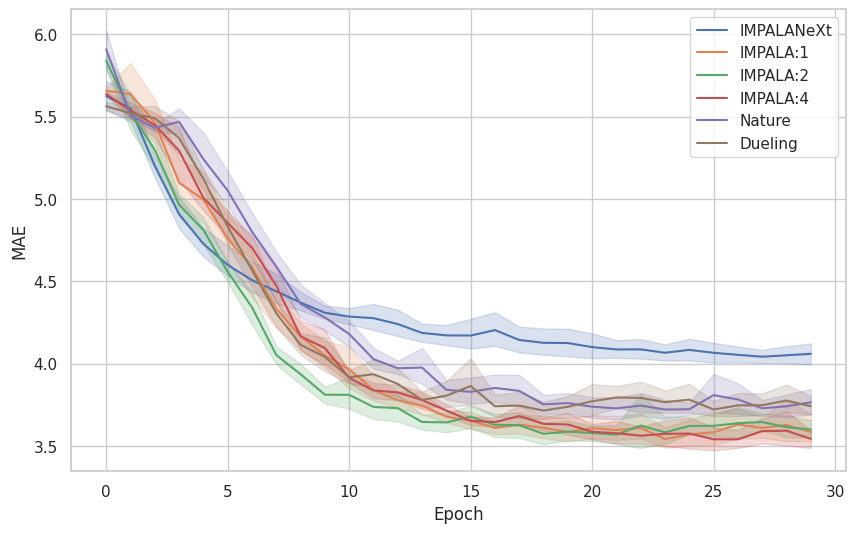

In [68]:
analyze_runs('autoconvnext/benchmark_final_impalanextv2_large_2_DQN_modern_Qbert_model_50000000_0_impalanextv2_large_2', label='IMPALANeXt')
analyze_runs('autoconvnext/benchmark_final_impala_large_1_DQN_modern_Qbert_model_50000000_0_impala_large_1', label='IMPALA:1')
analyze_runs('autoconvnext/benchmark_final_impala_large_2_DQN_modern_Qbert_model_50000000_0_impala_large_2', label='IMPALA:2')
analyze_runs('autoconvnext/benchmark_final_impala_large_4_DQN_modern_Qbert_model_50000000_0_impala_large_4', label='IMPALA:4')
analyze_runs('autoconvnext/benchmark_final_nature_DQN_modern_Qbert_model_50000000_0_nature', label='Nature')
analyze_runs('autoconvnext/benchmark_final_dueling_DQN_modern_Qbert_model_50000000_0_dueling', label='Dueling')
import matplotlib.pyplot as plt
plt.savefig('res_10_reps.png', dpi=600)